In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import statistics 
from scipy.stats import truncnorm

In [ ]:
import os

# Define default path for saving figures
FIGURE_DIR = "/YOURPATH"

# Create the directory if it doesn't exist
os.makedirs(FIGURE_DIR, exist_ok=True)

In [2]:
County = pd.read_csv('counties_V0_0313.csv')
County

,Unnamed: 0,CTYNAME,age_grp,N0,V0_1,V0_2,V0_3,V0_4,V0_5,V0_6,...,S0_6,S0_7,R0,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7
0,1,Anderson,0_4,3009,2943,2492,2932,3009,2793,2642,...,367,0,0,1,1,1,2,1,1,2
1,2,Anderson,20,45233,44245,37460,44073,45233,41984,39722,...,5511,0,0,0,0,0,0,0,0,0
2,3,Anderson,5_19,9494,7527,6373,7497,7692,7142,6757,...,2737,1802,0,0,0,0,0,0,0,0
3,4,Andrews,0_4,1473,1454,1233,1435,1473,1380,1306,...,167,0,0,1,1,1,1,1,1,1
4,5,Andrews,20,12344,12183,10331,12027,12344,11566,10949,...,1395,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,Zapata,20,8958,8935,7592,8728,8958,8487,8039,...,919,0,0,0,0,0,0,0,0,0
746,747,Zapata,5_19,3807,3077,2614,3008,3084,2922,2768,...,1039,723,0,0,0,0,0,0,0,0
747,748,Zavala,0_4,734,733,623,715,734,697,660,...,74,0,0,0,0,0,0,0,0,0
748,749,Zavala,20,6263,6257,5317,6102,6263,5944,5630,...,633,0,0,0,0,0,0,0,0,0


In [3]:
name_list = County['CTYNAME'].unique().tolist()
name_list[2]

'Angelina'

In [4]:
value = County.loc[(County['CTYNAME'] == name_list[2]) & (County['age_grp'] =='20'), 'N0'].values[0]
value

63009

In [5]:
def computerate(i, CWW, aW, I, Ni):
    rate = 0
    for n in range(3):
        rate += aW*CWW[i][n]*(np.sum(max(0, I[n]))/Ni[n])
        #return 1
    return rate

In [6]:
#define paramters 
#VE for three age group epsilon 
epsilon=[0.93, 0.97, 0.97]

#Exposed to infectious rate, sigma
sigma_ub=float(1/7)
sigma_lb=float(1/14)
sigma_pe=(sigma_ub+sigma_lb)/2

#I to R rate, gamma 1
gamma1_ub=float(1/4)
gamma1_lb=float(1/7)
gamma1_pe=(gamma1_ub+gamma1_lb)/2

#H to R rate, gamma 2 
gamma2_ub=float(1/5)
gamma2_lb=float(1/6)
gamma2_pe=(gamma2_ub+gamma2_lb)/2

#IHR
IHR_ub=[gamma1_ub*0.29/(1-0.29),gamma1_ub*0.13/(1-0.13),gamma1_ub*0.17/(1-0.17)]
IHR_lb=[gamma1_lb*0.29/(1-0.29),gamma1_lb*0.13/(1-0.13),gamma1_lb*0.17/(1-0.17)]
IHR_pe=[(IHR_ub[0]+IHR_lb[0])/2,(IHR_ub[1]+IHR_lb[1])/2,(IHR_ub[2]+IHR_lb[2])/2]

#HDR
HDR_ub=[gamma2_ub*(0.3/29)/(1-(0.3/29)),gamma2_ub*(0.3/13)/(1-(0.3/13)),gamma2_ub*(0.3/17)/(1-(0.3/17))]
HDR_lb=[gamma2_lb*(0.1/29)/(1-(0.1/29)),gamma2_lb*(0.1/13)/(1-(0.1/13)),gamma2_lb*(0.1/17)/(1-(0.1/17))]
HDR_pe=[(HDR_ub[0]+HDR_lb[0])/2,(HDR_ub[1]+HDR_lb[1])/2,(HDR_ub[2]+HDR_lb[2])/2]

#contact matrix
CM=[[1.4101, 2.5282, 4.91],[ 0.9290, 11.0091, 6.0771], [0.4884, 1.6387, 8.8461]]

In [8]:
def sim_sto1(x, County_name):
    Nd=145
    dt=1
    
    #parameters from Gaines
    beta0=2.17998025
    beta1=0.14073593
    beta2=0.00982261
    con0=0.09214861
    con1=0.10131082
    con2=1
    std0=5.27842112e-02
    std1=2.29420234e-05
    std2=1.15952820e-03

    mu = 0.891
    sigma = 0.0505
    a, b = (0 - mu) / sigma, (1 - mu) / sigma  # bounds for truncation
    rho = truncnorm.rvs(a, b, loc=mu, scale=sigma)
    
    n1=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='0_4'), 'N0'].values[0]
    n2=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='5_19'), 'N0'].values[0]
    n3=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='20'), 'N0'].values[0]
    N=[n1, n2, n3]
    
    v1=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='0_4'), 'V0_7'].values[0]
    v2=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='5_19'), 'V0_7'].values[0]
    v3=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='20'), 'V0_7'].values[0]
    V=[v1, v2, v3]
    theta=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='0_4'), 'theta_7'].values[0]

    S1 = np.zeros([3])  # contactable susceptibles
    S2 = np.zeros([3])  # isolated susceptibles
    V1 = np.zeros([3])  # contactable vaccinated
    V2 = np.zeros([3]) # isolated vaccinated
    E = np.zeros([3])
    I = np.zeros([3])
    R = np.zeros([3])
    H = np.zeros([3])
    D = np.zeros([3])
    
    S1_new = np.zeros([3])
    S2_new = np.zeros([3])
    V1_new = np.zeros([3])
    V2_new = np.zeros([3])
    E_new = np.zeros([3])
    I_new = np.zeros([3])
    R_new = np.zeros([3])
    H_new = np.zeros([3])
    D_new = np.zeros([3])
   
    case_count=0
    hosp_count=0
    death_count=0
    case_count0=0
    hosp_count0=0
    death_count0=0
    case_count1=0
    hosp_count1=0
    death_count1=0
    case_count2=0
    hosp_count2=0
    death_count2=0
    
    cumcase=np.zeros([Nd])
    cumhosp=np.zeros([Nd])
    cumdeath=np.zeros([Nd])
    cumcase0=np.zeros([Nd])
    cumhosp0=np.zeros([Nd])
    cumdeath0=np.zeros([Nd])
    cumcase1=np.zeros([Nd])
    cumhosp1=np.zeros([Nd])
    cumdeath1=np.zeros([Nd])
    cumcase2=np.zeros([Nd])
    cumhosp2=np.zeros([Nd])
    cumdeath2=np.zeros([Nd])
    cumI=np.zeros([Nd])
    cumH=np.zeros([Nd])
    cumD=np.zeros([Nd])

    x_contact = [con0, con1, con2]
    
    # Set initial susceptible (total - vaccinated)
    for n in range(3):
        contact_rate = x_contact[n]
        S_total = N[n] - V[n]
        S1[n] = S_total * contact_rate
        S2[n] = S_total * (1 - contact_rate)
        v_total = V[n]
        V1[n] = v_total * contact_rate
        V2[n] = v_total * (1 - contact_rate)
        
    # Seed 1 initial infection in age group 5-19
    I[1]=1
    
    # Start Time Loop (Daily Simulation)
    for tt in range(int(Nd/dt)):
        np.random.seed()
        sig=np.random.uniform(sigma_lb,sigma_ub)
        gam1=np.random.uniform(gamma1_lb,gamma1_ub)
        gam2=np.random.uniform(gamma2_lb,gamma2_ub)
        IHR=[np.random.uniform(IHR_lb[0],IHR_ub[0]),np.random.uniform(IHR_lb[1],IHR_ub[1]),np.random.uniform(IHR_lb[2],IHR_ub[2])]
        HDR=[np.random.uniform(HDR_lb[0],HDR_ub[0]),np.random.uniform(HDR_lb[1],HDR_ub[1]),np.random.uniform(HDR_lb[2],HDR_ub[2])]

        for i in range(3):
            if i==0:
                rnd=np.random.normal(0, std0, 1)
                beta=beta0+2*rnd
                eps=epsilon[0]
                ihr=IHR[0]
                hdr=HDR[0]
                the=theta
            if i==1:
                rnd=np.random.normal(0, std1, 1)
                beta=beta1+2*rnd
                eps=epsilon[1]
                ihr=IHR[1]
                hdr=HDR[1]
                the=0
            if i==2:
                rnd=np.random.normal(0, std2, 1)
                beta=beta2+2*rnd
                eps=epsilon[2]
                ihr=IHR[2]
                hdr=HDR[2]
                the=0

            N_dyn = S1 + E + I + R + H + D + V1
            N_sum = np.sum(S1 + S2 + E + I + R + H + D + V1 + V2)
            foi = beta * computerate(i, CM, 1, I, N_dyn)
            
            S1_new[i] = max(0,S1[i] - foi * S1[i] - the*x_contact[i])
            S2_new[i] = S2[i] - the*(1-x_contact[i])# no contact
            V1_new[i] = V1[i] - foi * V1[i] * (1 - eps) + the*x_contact[i]
            V2_new[i] = V2[i] + the*(1-x_contact[i]) # static if no movement
            
            E_new[i]=E[i]+foi*S1[i]+foi*V1[i]*(1-eps)-sig*E[i]
            I_new[i]=I[i]+sig*E[i]-(ihr+gam1)*I[i]
            case_count=case_count+sig*E[i]* rho
            cumcase[tt]=case_count
            H_new[i]=H[i]+ihr*I[i]-(hdr+gam2)*H[i]
            hosp_count=hosp_count+ihr*I[i]* rho
            cumhosp[tt]=hosp_count
            R_new[i]=R[i]+gam1*I[i]+gam2*H[i]
            D_new[i]=D[i]+hdr*H[i]
            death_count=death_count+hdr*H[i]* rho
            cumdeath[tt]=death_count
            if i==0:
                case_count0=case_count0+sig*E[i]* rho
                cumcase0[tt]=case_count0
                hosp_count0=hosp_count0+ihr*I[i]* rho
                cumhosp0[tt]=hosp_count0
                death_count0=death_count0+hdr*H[i]* rho
                cumdeath0[tt]=death_count0
            if i==1:
                case_count1=case_count1+sig*E[i]* rho
                cumcase1[tt]=case_count1
                hosp_count1=hosp_count1+ihr*I[i]* rho
                cumhosp1[tt]=hosp_count1
                death_count1=death_count1+hdr*H[i]* rho
                cumdeath1[tt]=death_count1
            if i==2:
                case_count2=case_count2+sig*E[i]* rho
                cumcase2[tt]=case_count2
                hosp_count2=hosp_count2+ihr*I[i]* rho
                cumhosp2[tt]=hosp_count2
                death_count2=death_count2+hdr*H[i]* rho
                cumdeath2[tt]=death_count2
            
        
        S1 = S1_new; S2 = S2_new; V1=V1_new; V2=V2_new; E=E_new; I=I_new; H=H_new; R=R_new; D=D_new;
        cumI[tt]=np.sum(I)
        cumH[tt]=np.sum(H)
        cumD[tt]=np.sum(D)
    
    fit_case=[cumcase[0],cumcase[50], cumcase[78], cumcase[99], cumcase[120], cumcase[141],100*sum(cumcase0)/sum(cumcase),100*sum(cumcase1)/sum(cumcase),100*sum(cumcase2)/sum(cumcase)]
    return fit_case, cumI, cumH, cumD, cumcase, cumhosp, cumdeath, cumcase0, cumhosp0, cumcase1, cumhosp1, cumcase2, cumhosp2
    
    

In [10]:
def sim_scenario(County_name):
    Nsim = 200
    Nd=145
    
    new_Inf = np.zeros([Nd, Nsim])
    new_Hosp = np.zeros([Nd, Nsim])
    new_Death = np.zeros([Nd, Nsim])
    cum_Inf = np.zeros([Nd, Nsim])
    cum_Hosp = np.zeros([Nd, Nsim])
    cum_Death = np.zeros([Nd, Nsim])
    cum_Inf0 = np.zeros([Nd, Nsim])
    cum_Inf1 = np.zeros([Nd, Nsim])
    cum_Inf2 = np.zeros([Nd, Nsim])
    cum_Hosp0 = np.zeros([Nd, Nsim])
    cum_Hosp1 = np.zeros([Nd, Nsim])
    cum_Hosp2 = np.zeros([Nd, Nsim])
    
    for i in range(Nsim):
        fit_case, cumI, cumH, cumD, cumcase, cumhosp, cumdeath, cumcase0, cumhosp0, cumcase1, cumhosp1, cumcase2, cumhosp2=sim_sto1(0, County_name)
        new_Inf[:,i]=cumI
        new_Hosp[:,i]=cumH
        new_Death[:,i]=cumD
        cum_Inf[:,i]=cumcase
        cum_Hosp[:,i]=cumhosp
        cum_Death[:,i]=cumdeath
        cum_Inf0[:,i]=cumcase0
        cum_Inf1[:,i]=cumcase1
        cum_Inf2[:,i]=cumcase2
        cum_Hosp0[:,i]=cumhosp0
        cum_Hosp1[:,i]=cumhosp1
        cum_Hosp2[:,i]=cumhosp2
    
    new_Inf_p = np.zeros([Nd, 25])
    new_Hosp_p = np.zeros([Nd, 25])
    new_Death_p = np.zeros([Nd, 25])
    cum_Inf_p = np.zeros([Nd, 25])
    cum_Hosp_p = np.zeros([Nd, 25])
    cum_Death_p = np.zeros([Nd, 25])
    cum_Inf0_p = np.zeros([Nd, 25])
    cum_Inf1_p = np.zeros([Nd, 25])
    cum_Inf2_p = np.zeros([Nd, 25])
    cum_Hosp0_p = np.zeros([Nd, 25])
    cum_Hosp1_p = np.zeros([Nd, 25])
    cum_Hosp2_p = np.zeros([Nd, 25])
    
    n1=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='0_4'), 'N0'].values[0]
    n2=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='5_19'), 'N0'].values[0]
    n3=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='20'), 'N0'].values[0]
    
    for i in range(Nd):
        new_Inf_p[i,:]=np.percentile(new_Inf[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_Hosp_p[i,:]=np.percentile(new_Hosp[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_Death_p[i,:]=np.percentile(new_Death[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Inf_p[i,:]=np.percentile(cum_Inf[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Hosp_p[i,:]=np.percentile(cum_Hosp[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Death_p[i,:]=np.percentile(cum_Death[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Inf0_p[i,:] = np.percentile(cum_Inf0[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Inf1_p[i,:] = np.percentile(cum_Inf1[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Inf2_p[i,:] = np.percentile(cum_Inf2[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Hosp0_p[i,:] = np.percentile(cum_Hosp0[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Hosp1_p[i,:] = np.percentile(cum_Hosp1[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Hosp2_p[i,:] = np.percentile(cum_Hosp2[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])

    return new_Inf_p, new_Hosp_p, new_Death_p, cum_Inf_p, cum_Hosp_p, cum_Death_p,cum_Inf0_p,cum_Inf1_p,cum_Inf2_p,cum_Hosp0_p,cum_Hosp1_p,cum_Hosp2_p, n1, n2, n3

In [11]:
new_Inf_p_A, new_Hosp_p_A, new_Death_p_A, cum_Inf_p_A, cum_Hosp_p_A, cum_Death_p_A,cum_Inf0_p_A,cum_Inf1_p_A,cum_Inf2_p_A,cum_Hosp0_p_A,cum_Hosp1_p_A,cum_Hosp2_p_A, n1_A, n2_A, n3_A=sim_scenario('Harris')

/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_70373/1122267677.py:134: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  V1_new[i] = V1[i] - foi * V1[i] * (1 - eps) + the*x_contact[i]
/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_70373/1122267677.py:137: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  E_new[i]=E[i]+foi*S1[i]+foi*V1[i]*(1-eps)-sig*E[i]
/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_70373/1122267677.py:132: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this ope

In [45]:
res_data = []
Nd=145

# Loop through name_list and assign a number
for i, County_name in enumerate(name_list, start=1):
    new_Inf_p_A, new_Hosp_p_A, new_Death_p_A, cum_Inf_p_A, cum_Hosp_p_A, cum_Death_p_A,cum_Inf0_p_A,cum_Inf1_p_A,cum_Inf2_p_A,cum_Hosp0_p_A,cum_Hosp1_p_A,cum_Hosp2_p_A, n1_A, n2_A, n3_A=sim_scenario(County_name)
    
    res_data.append({'CTYNAME': County_name,'0_4': n1_A, '5_19': n2_A, '20_': n3_A, 'Cum_inf': cum_Inf_p_A[Nd-1,12],'Cum_inf_low': cum_Inf_p_A[Nd-1,2],'Cum_inf_high': cum_Inf_p_A[Nd-1,22], 'Cum_inf_0': cum_Inf0_p_A[Nd-1,12], 'Cum_inf_0_low': cum_Inf0_p_A[Nd-1,2],'Cum_inf_0_high': cum_Inf0_p_A[Nd-1,22], 'Cum_inf_1': cum_Inf1_p_A[Nd-1,12], 'Cum_inf_1_low': cum_Inf1_p_A[Nd-1,2],'Cum_inf_1_high': cum_Inf1_p_A[Nd-1,22], 'Cum_inf_2': cum_Inf2_p_A[Nd-1,12], 'Cum_inf_2_low': cum_Inf2_p_A[Nd-1,2], 'Cum_inf_2_high': cum_Inf2_p_A[Nd-1,22], 'Cum_Hosp': cum_Hosp_p_A[Nd-1,12],'Cum_Hosp_low': cum_Hosp_p_A[Nd-1,2],'Cum_Hosp_high': cum_Hosp_p_A[Nd-1,22], 'Cum_Hosp_0': cum_Hosp0_p_A[Nd-1,12], 'Cum_Hosp_0_low': cum_Hosp0_p_A[Nd-1,2],'Cum_Hosp_0_high': cum_Hosp0_p_A[Nd-1,22], 'Cum_Hosp_1': cum_Hosp1_p_A[Nd-1,12], 'Cum_Hosp_1_low': cum_Hosp1_p_A[Nd-1,2],'Cum_Hosp_1_high': cum_Hosp1_p_A[Nd-1,22], 'Cum_Hosp_2': cum_Hosp2_p_A[Nd-1,12], 'Cum_Hosp_2_low': cum_Hosp2_p_A[Nd-1,2],'Cum_Hosp_2_high': cum_Hosp2_p_A[Nd-1,22]})
    print(i)
    
# Create DataFrame
df = pd.DataFrame(res_data)

# Display DataFrame
print(df)



/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_70373/1122267677.py:134: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  V1_new[i] = V1[i] - foi * V1[i] * (1 - eps) + the*x_contact[i]
/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_70373/1122267677.py:137: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  E_new[i]=E[i]+foi*S1[i]+foi*V1[i]*(1-eps)-sig*E[i]
/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_70373/1122267677.py:132: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this ope

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
      CTYNAME   0_4   5_19    20_     Cum_inf  Cum_inf_low  Cum_inf_high  \
0    Anderson  3009   9494  4523

In [46]:
df.to_csv("county_high_0621.csv", index=False)

In [47]:
df = pd.read_csv("county_high_0621.csv")

<Axes: >

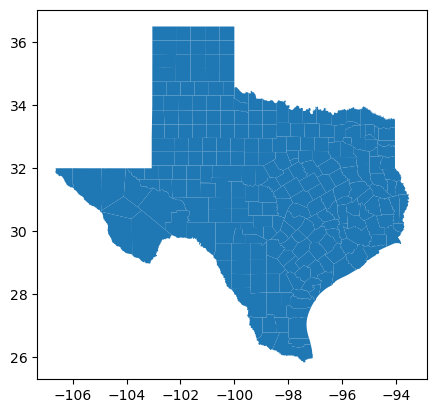

In [16]:
import fiona
import geopandas as gpd

# Use Fiona's environment context to restore the SHX file automatically
with fiona.Env(SHAPE_RESTORE_SHX='YES'):
    counties = gpd.read_file("tl_2022_us_county.shp")

# Filter for Texas counties (STATEFP "48")
tx_counties = counties[counties['STATEFP'] == '48']

# Now you can work with tx_counties (e.g., plot or merge with your data)
tx_counties.plot()

In [17]:
def extract_scalar(x):
    # If x is an array with one element, extract that element;
    # if it has more than one element and you want the first, use x[0].
    if isinstance(x, np.ndarray):
        return x[0]  # or np.mean(x) if you prefer the average
    return x

In [48]:
merged = tx_counties.merge(df, left_on="NAME", right_on="CTYNAME", how="left")

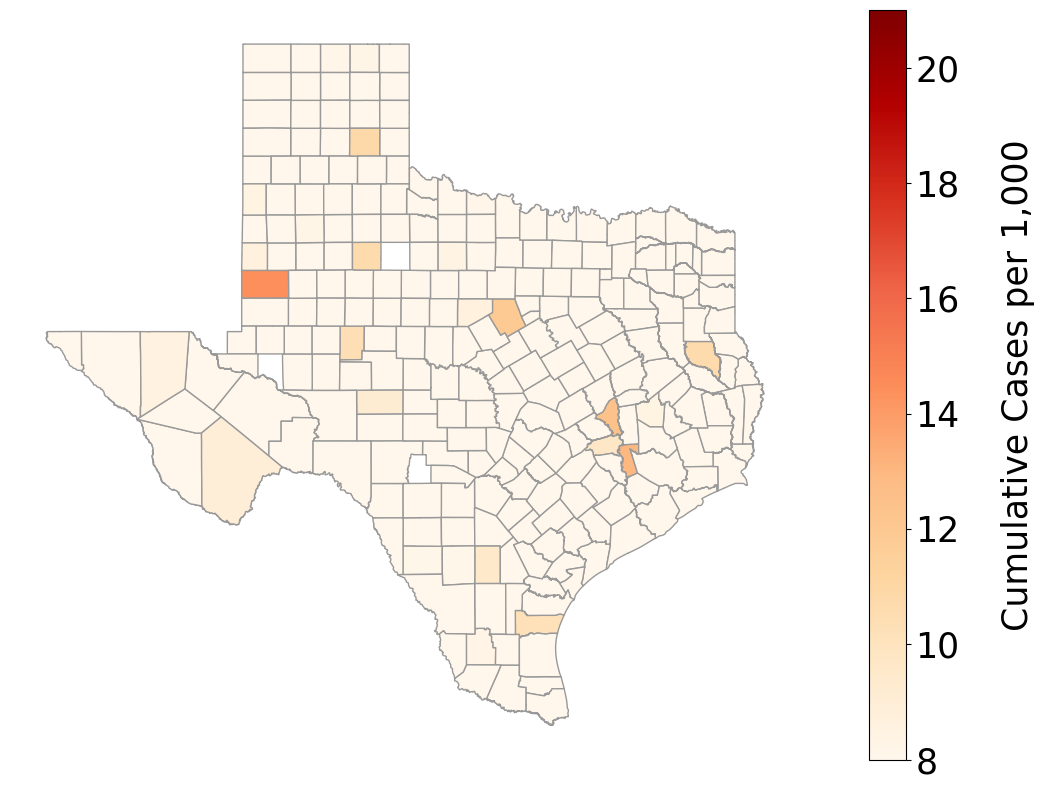

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

merged["Cum_inf"] = merged["Cum_inf"].apply(extract_scalar)
merged["0_4"] = merged["0_4"].apply(extract_scalar)
merged["5_19"] = merged["5_19"].apply(extract_scalar)
merged["20_"] = merged["20_"].apply(extract_scalar)

# Now recalculate your incidence column
merged["Cum_inf_100k"] = (merged["Cum_inf"] / (merged["0_4"] + merged["5_19"] + merged["20_"])) * 1000
merged["Cum_inf_100k_low"] = (merged["Cum_inf_low"] / (merged["0_4"] + merged["5_19"] + merged["20_"])) * 1000
merged["Cum_inf_100k_high"] = (merged["Cum_inf_high"] / (merged["0_4"] + merged["5_19"] + merged["20_"])) * 1000

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_inf_100k", cmap="OrRd", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=8, vmax=21))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 8, 21  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="OrRd", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size\
cbar.ax.set_ylabel("Cumulative Cases per 1,000", fontsize=25, rotation=90, labelpad=30)
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
#ax.set_title("Cumulative Cases Per 1000 (Texas average or more)", fontsize=25)
ax.set_axis_off()

# Save the figure
output_path = os.path.join(FIGURE_DIR, "cum_i5_per.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


In [42]:
# Rank the counties by "Cum_inf_100k" in descending order and select the top 10
top10 = merged.sort_values(by="Cum_inf_100k", ascending=False).head(10)
with pd.option_context('display.max_columns', None):
    print(top10)

    STATEFP COUNTYFP  COUNTYNS  GEOID         NAME            NAMELSAD LSAD  \
74       48      165  01383868  48165       Gaines       Gaines County   06   
71       48      473  01384022  48473       Waller       Waller County   06   
13       48      041  01383806  48041       Brazos       Brazos County   06   
52       48      143  01383857  48143        Erath        Erath County   06   
129      48      129  01383850  48129       Donley       Donley County   06   
197      48      263  01383917  48263         Kent         Kent County   06   
105      48      347  01383959  48347  Nacogdoches  Nacogdoches County   06   
110      48      431  01384001  48431     Sterling     Sterling County   06   
73       48      273  01383922  48273      Kleberg      Kleberg County   06   
43       48      477  01384024  48477   Washington   Washington County   06   

    CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT       ALAND     AWATER  \
74       H1  G4020  None   None     None        A  389

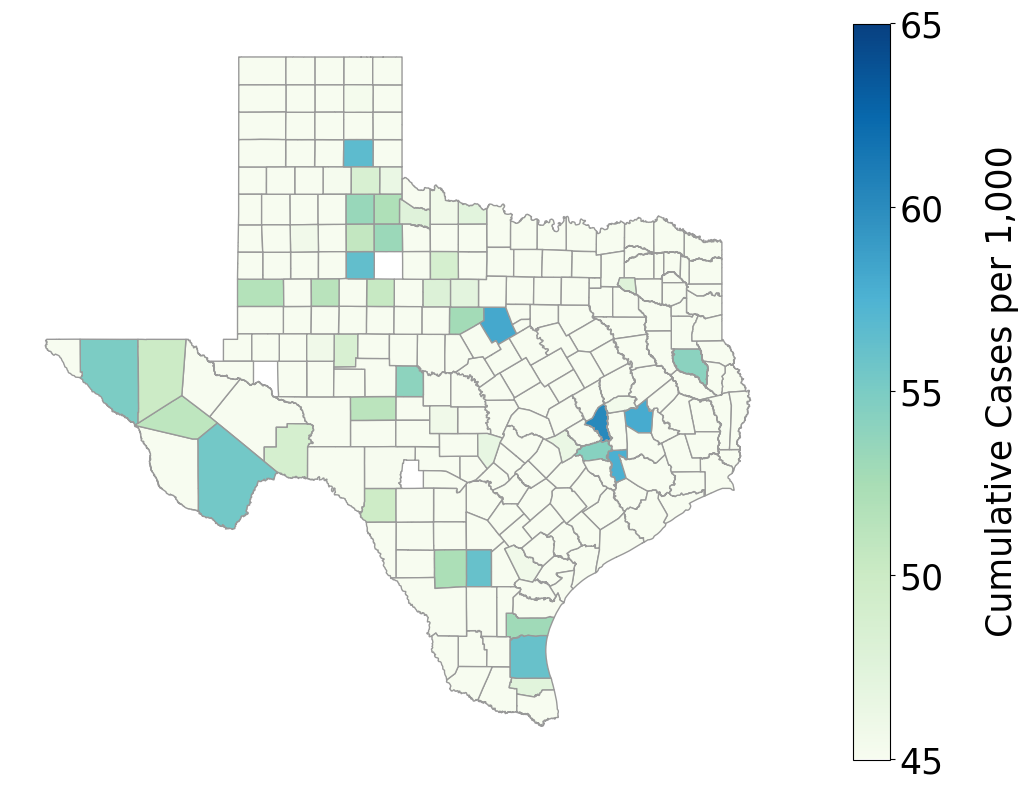

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

merged["Cum_inf_0"] = merged["Cum_inf_0"].apply(extract_scalar)
merged["0_4"] = merged["0_4"].apply(extract_scalar)
merged["5_19"] = merged["5_19"].apply(extract_scalar)
merged["20_"] = merged["20_"].apply(extract_scalar)

# Now recalculate your incidence column
merged["Cum_inf_0_100k"] = (merged["Cum_inf_0"] / (merged["0_4"])) * 1000
merged["Cum_inf_0_100k_low"] = (merged["Cum_inf_0_low"] / (merged["0_4"])) * 1000
merged["Cum_inf_0_100k_high"] = (merged["Cum_inf_0_high"] / (merged["0_4"])) * 1000

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_inf_0_100k", cmap="GnBu", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=45, vmax=65))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 45, 65  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="GnBu", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
cbar.ax.set_ylabel("Cumulative Cases per 1,000", fontsize=25, rotation=90, labelpad=30)

# Set colorbar ticks every 5
tick_values = list(range(vmin, vmax + 1, 5))  # E.g., [45, 50, 55, 60, 65]
cbar.set_ticks(tick_values)
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
#ax.set_title("Cumulative Cases 0_4 Per 1000 (Texas average)", fontsize=25)
ax.set_axis_off()

# Save the figure
output_path = os.path.join(FIGURE_DIR, "cum_i5_per_0_4.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


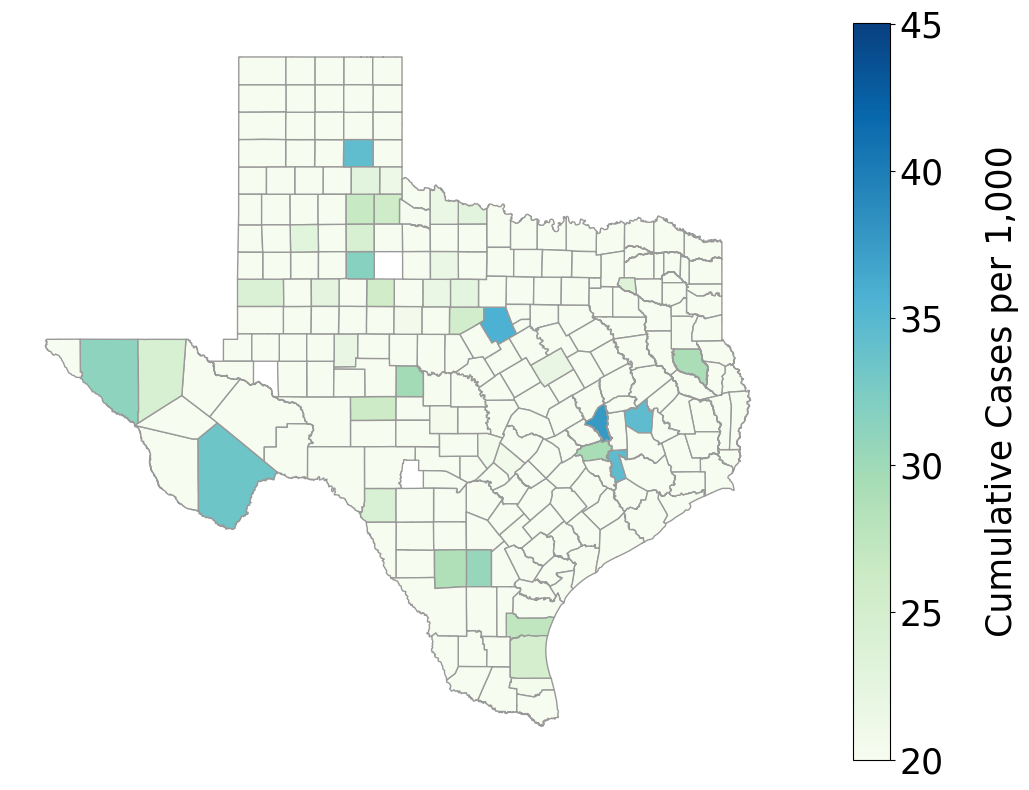

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

merged["Cum_inf_1"] = merged["Cum_inf_1"].apply(extract_scalar)
merged["0_4"] = merged["0_4"].apply(extract_scalar)
merged["5_19"] = merged["5_19"].apply(extract_scalar)
merged["20_"] = merged["20_"].apply(extract_scalar)

# Now recalculate your incidence column
merged["Cum_inf_1_100k"] = (merged["Cum_inf_1"] / (merged["5_19"])) * 1000
merged["Cum_inf_1_100k_low"] = (merged["Cum_inf_1_low"] / (merged["5_19"])) * 1000
merged["Cum_inf_1_100k_high"] = (merged["Cum_inf_1_high"] / (merged["5_19"])) * 1000

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_inf_1_100k", cmap="GnBu", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=20, vmax=45))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 20, 45  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="GnBu", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
cbar.ax.set_ylabel("Cumulative Cases per 1,000", fontsize=25, rotation=90, labelpad=30)
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
#ax.set_title("Cumulative Cases 5_19 Per 1000 (Texas average)", fontsize=25)
ax.set_axis_off()

# Save the figure
output_path = os.path.join(FIGURE_DIR, "cum_i5_per_5_19.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


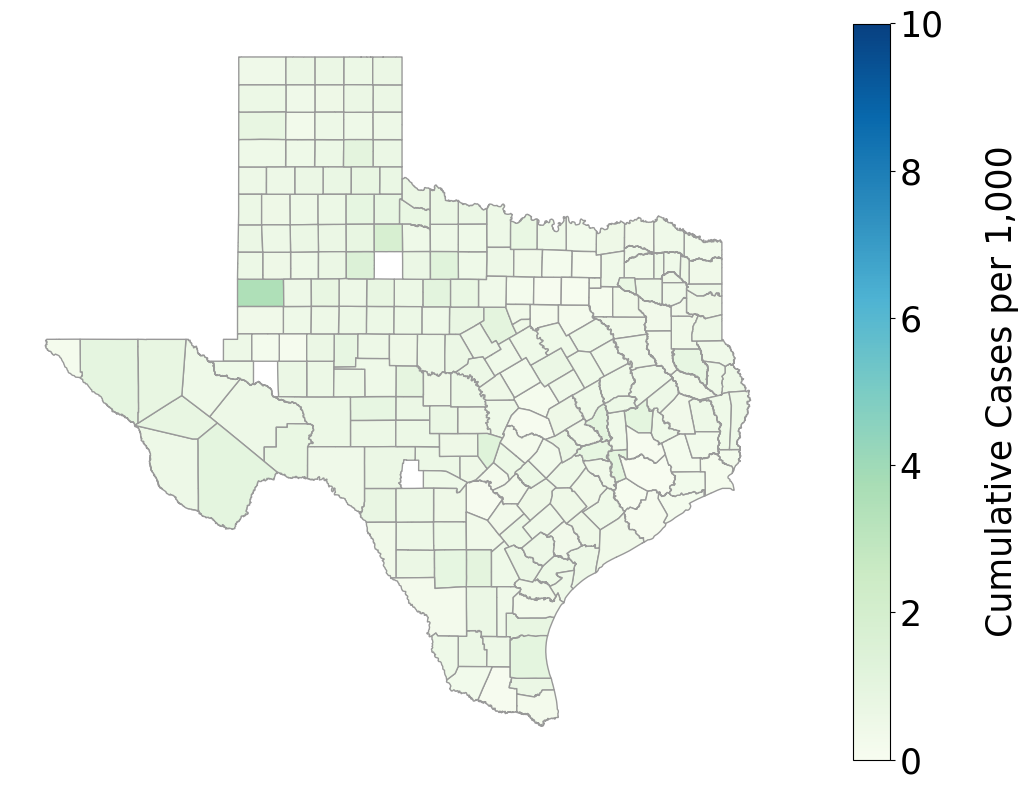

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

merged["Cum_inf_2"] = merged["Cum_inf_2"].apply(extract_scalar)
merged["0_4"] = merged["0_4"].apply(extract_scalar)
merged["5_19"] = merged["5_19"].apply(extract_scalar)
merged["20_"] = merged["20_"].apply(extract_scalar)

# Now recalculate your incidence column
merged["Cum_inf_2_100k"] = (merged["Cum_inf_2"] / (merged["20_"])) * 1000
merged["Cum_inf_2_100k_low"] = (merged["Cum_inf_2_low"] / (merged["20_"])) * 1000
merged["Cum_inf_2_100k_high"] = (merged["Cum_inf_2_high"] / (merged["20_"])) * 1000

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_inf_2_100k", cmap="GnBu", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=10))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 10  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="GnBu", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
cbar.ax.set_ylabel("Cumulative Cases per 1,000", fontsize=25, rotation=90, labelpad=30)
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
#ax.set_title("Cumulative Cases 20+ Per 1000 (Texas average)", fontsize=25)
ax.set_axis_off()

# Save the figure
output_path = os.path.join(FIGURE_DIR, "cum_i5_per_20.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


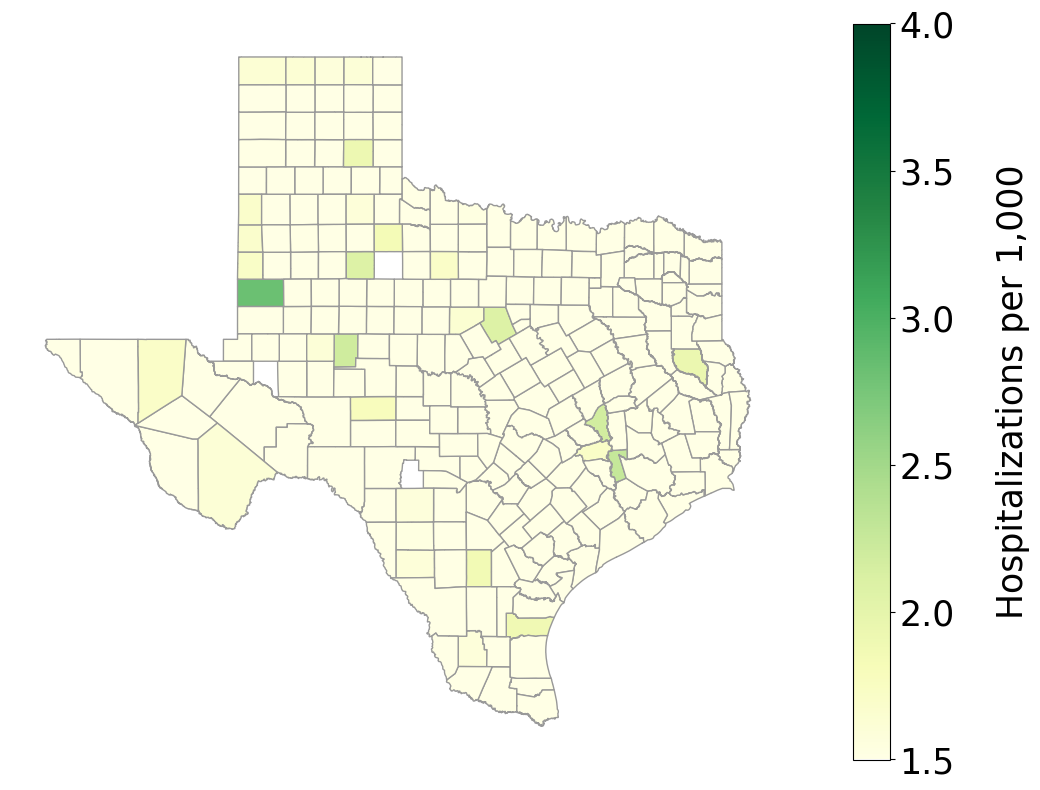

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

merged["Cum_Hosp"] = merged["Cum_Hosp"].apply(extract_scalar)
merged["0_4"] = merged["0_4"].apply(extract_scalar)
merged["5_19"] = merged["5_19"].apply(extract_scalar)
merged["20_"] = merged["20_"].apply(extract_scalar)

# Now recalculate your incidence column
merged["Cum_Hosp_100k"] = (merged["Cum_Hosp"] / (merged["0_4"] + merged["5_19"] + merged["20_"])) * 1000
merged["Cum_Hosp_100k_low"] = (merged["Cum_Hosp_low"] / (merged["0_4"] + merged["5_19"] + merged["20_"])) * 1000
merged["Cum_Hosp_100k_high"] = (merged["Cum_Hosp_high"] / (merged["0_4"] + merged["5_19"] + merged["20_"])) * 1000

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_Hosp_100k", cmap="YlGn", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=1.5, vmax=4))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 1.5, 4  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="YlGn", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
cbar.ax.set_ylabel("Hospitalizations per 1,000", fontsize=25, rotation=90, labelpad=30)
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
#ax.set_title("Cumulative Hospitalizations Per 1000 (Texas average or more)", fontsize=25)
ax.set_axis_off()

# Save the figure
output_path = os.path.join(FIGURE_DIR, "cum_hosp_i5_per.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


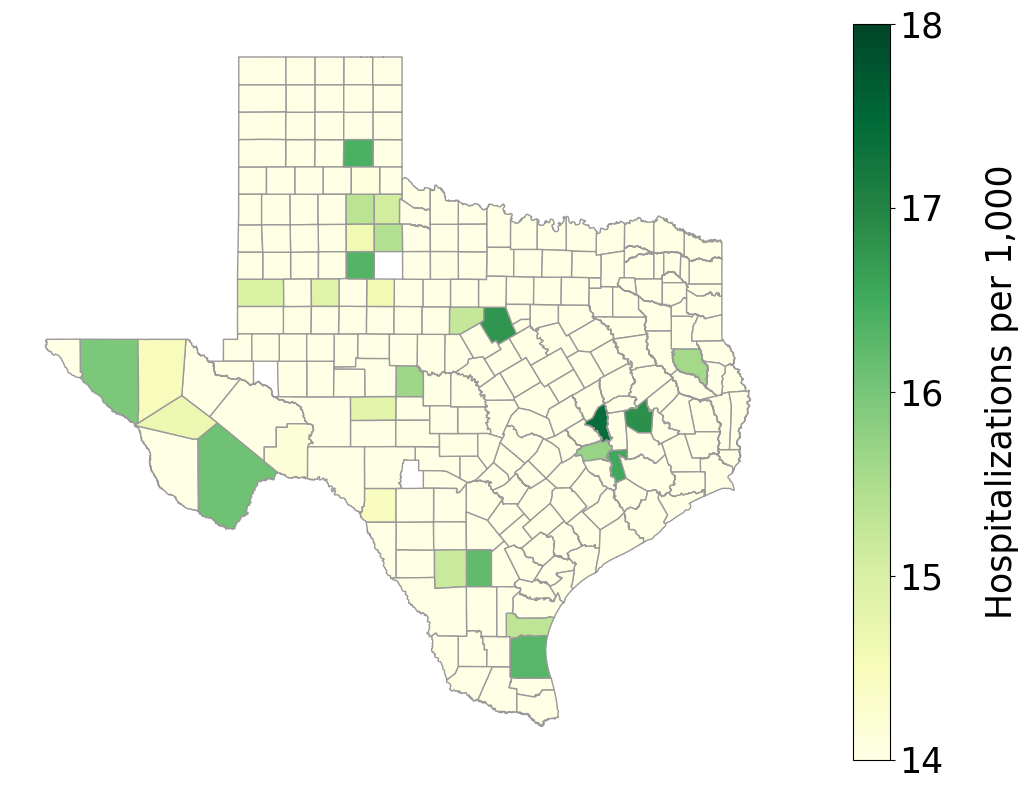

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

merged["Cum_Hosp_0"] = merged["Cum_Hosp_0"].apply(extract_scalar)
merged["0_4"] = merged["0_4"].apply(extract_scalar)
merged["5_19"] = merged["5_19"].apply(extract_scalar)
merged["20_"] = merged["20_"].apply(extract_scalar)

# Now recalculate your incidence column
merged["Cum_Hosp_0_100k"] = (merged["Cum_Hosp_0"] / (merged["0_4"])) * 1000
merged["Cum_Hosp_0_100k_low"] = (merged["Cum_Hosp_0_low"] / (merged["0_4"])) * 1000
merged["Cum_Hosp_0_100k_high"] = (merged["Cum_Hosp_0_high"] / (merged["0_4"])) * 1000

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_Hosp_0_100k", cmap="YlGn", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=14, vmax=18))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 14, 18  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="YlGn", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
cbar.ax.set_ylabel("Hospitalizations per 1,000", fontsize=25, rotation=90, labelpad=30)

# Set colorbar ticks every 5
tick_values = list(range(vmin, vmax + 1, 1))  # E.g., [45, 50, 55, 60, 65]
cbar.set_ticks(tick_values)
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
#ax.set_title("Cumulative Hospitalizations 0_4 Per 1000 (-15% Uptakes)", fontsize=25)
ax.set_axis_off()

# Save the figure
output_path = os.path.join(FIGURE_DIR, "cum_hosp_i5_per_0_4.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

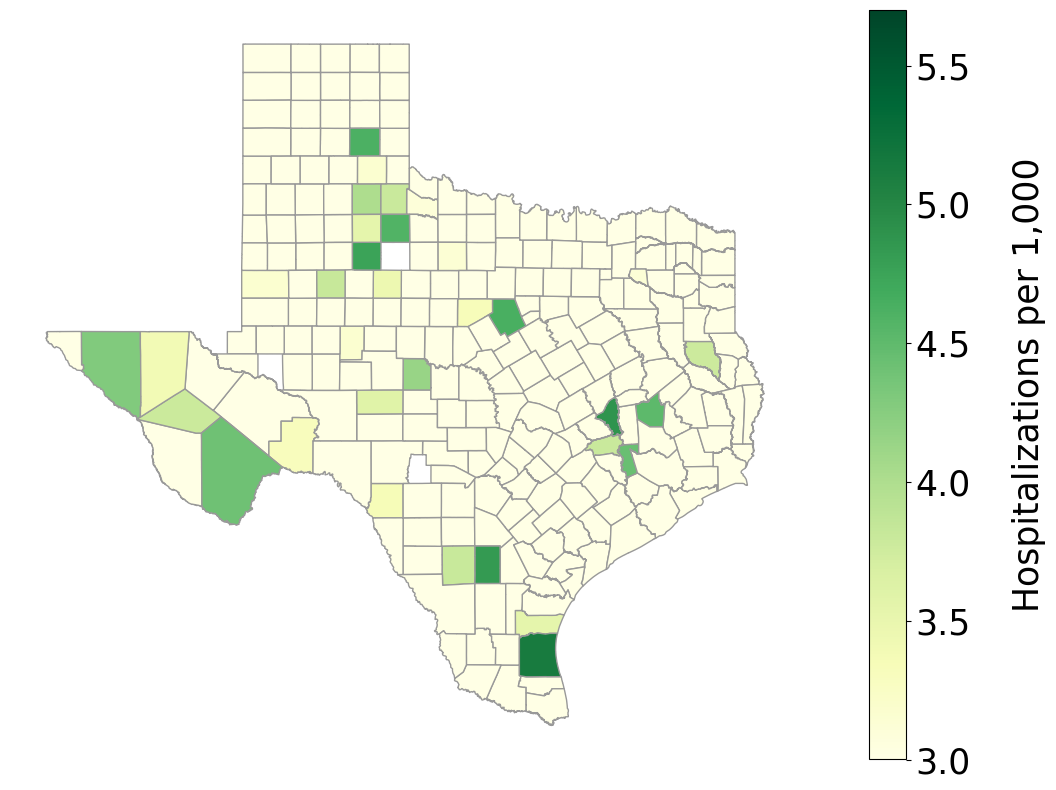

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

merged["Cum_Hosp_1"] = merged["Cum_Hosp_1"].apply(extract_scalar)
merged["0_4"] = merged["0_4"].apply(extract_scalar)
merged["5_19"] = merged["5_19"].apply(extract_scalar)
merged["20_"] = merged["20_"].apply(extract_scalar)

# Now recalculate your incidence column
merged["Cum_Hosp_1_100k"] = (merged["Cum_Hosp_1"] / (merged["5_19"])) * 1000
merged["Cum_Hosp_1_100k_low"] = (merged["Cum_Hosp_1_low"] / (merged["5_19"])) * 1000
merged["Cum_Hosp_1_100k_high"] = (merged["Cum_Hosp_1_high"] / (merged["5_19"])) * 1000

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_Hosp_1_100k", cmap="YlGn", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=3, vmax=5.7))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 3, 5.7  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="YlGn", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
cbar.ax.set_ylabel("Hospitalizations per 1,000", fontsize=25, rotation=90, labelpad=30)

# Set colorbar ticks every 5
#tick_values = list(range(vmin, vmax + 1, 1))  # E.g., [45, 50, 55, 60, 65]
#cbar.set_ticks(tick_values)
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
#ax.set_title("Cumulative Hospitalizations 0_4 Per 1000 (-15% Uptakes)", fontsize=25)
ax.set_axis_off()

# Save the figure
output_path = os.path.join(FIGURE_DIR, "cum_hosp_i5_per_5_19.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()

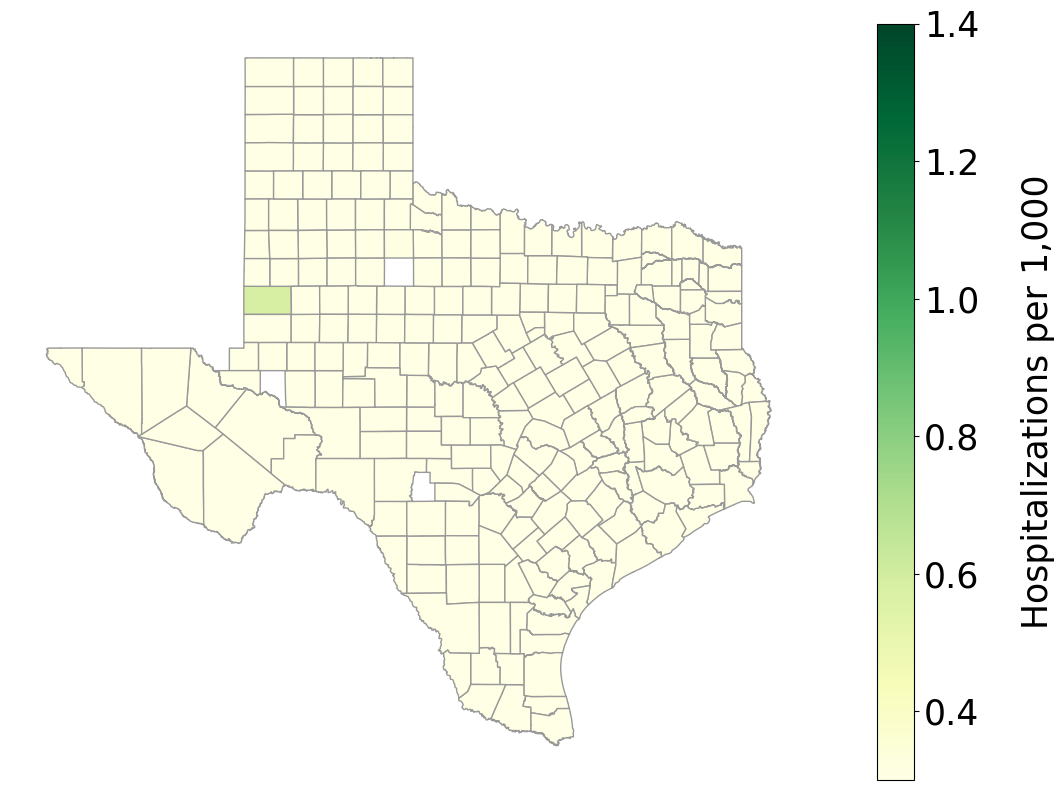

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

merged["Cum_Hosp_2"] = merged["Cum_Hosp_2"].apply(extract_scalar)
merged["0_4"] = merged["0_4"].apply(extract_scalar)
merged["5_19"] = merged["5_19"].apply(extract_scalar)
merged["20_"] = merged["20_"].apply(extract_scalar)

# Now recalculate your incidence column
merged["Cum_Hosp_2_100k"] = (merged["Cum_Hosp_2"] / (merged["20_"])) * 1000
merged["Cum_Hosp_2_100k_low"] = (merged["Cum_Hosp_2_low"] / (merged["20_"])) * 1000
merged["Cum_Hosp_2_100k_high"] = (merged["Cum_Hosp_2_high"] / (merged["20_"])) * 1000

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_Hosp_2_100k", cmap="YlGn", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0.3, vmax=1.4))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0.3, 1.4  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="YlGn", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
cbar.ax.set_ylabel("Hospitalizations per 1,000", fontsize=25, rotation=90, labelpad=30)

# Set colorbar ticks every 5
#tick_values = list(range(vmin, vmax + 1, 0.5))  # E.g., [45, 50, 55, 60, 65]
#cbar.set_ticks(tick_values)
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
#ax.set_title("Cumulative Hospitalizations 0_4 Per 1000 (-15% Uptakes)", fontsize=25)
ax.set_axis_off()

# Save the figure
output_path = os.path.join(FIGURE_DIR, "cum_hosp_i5_per_20.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [57]:
data = {
    "County Name": merged["NAME"],
    "Total Cases per 1,000": merged.apply(lambda row: f"{row['Cum_inf_100k']:.2f}\n[{row['Cum_inf_100k_low']:.2f}, {row['Cum_inf_100k_high']:.2f}]", axis=1),
    "0-4 Cases per 1,000": merged.apply(lambda row: f"{row['Cum_inf_0_100k']:.2f}\n[{row['Cum_inf_0_100k_low']:.2f}, {row['Cum_inf_0_100k_high']:.2f}]", axis=1),
    "5-19 Cases per 1,000": merged.apply(lambda row: f"{row['Cum_inf_1_100k']:.2f}\n[{row['Cum_inf_1_100k_low']:.2f}, {row['Cum_inf_1_100k_high']:.2f}]", axis=1),
    "20+ Cases per 1,000": merged.apply(lambda row: f"{row['Cum_inf_2_100k']:.2f}\n[{row['Cum_inf_2_100k_low']:.2f}, {row['Cum_inf_2_100k_high']:.2f}]", axis=1),
    "Total Hosp per 1,000": merged.apply(lambda row: f"{row['Cum_Hosp_100k']:.2f}\n[{row['Cum_Hosp_100k_low']:.2f}, {row['Cum_Hosp_100k_high']:.2f}]", axis=1),
    "0-4 Hosp per 1,000": merged.apply(lambda row: f"{row['Cum_Hosp_0_100k']:.2f}\n[{row['Cum_Hosp_0_100k_low']:.2f}, {row['Cum_Hosp_0_100k_high']:.2f}]", axis=1),
    "5-19 Hosp per 1,000": merged.apply(lambda row: f"{row['Cum_Hosp_1_100k']:.2f}\n[{row['Cum_Hosp_1_100k_low']:.2f}, {row['Cum_Hosp_1_100k_high']:.2f}]", axis=1),
    "20+ Hosp per 1,000": merged.apply(lambda row: f"{row['Cum_Hosp_2_100k']:.2f}\n[{row['Cum_Hosp_2_100k_low']:.2f}, {row['Cum_Hosp_2_100k_high']:.2f}]", axis=1),
}

table_df = pd.DataFrame(data)

# Convert "nan\n[nan, nan]" strings to real np.nan
def is_fake_nan(cell):
    return isinstance(cell, str) and 'nan' in cell.lower()

# Apply conversion
table_df = table_df.applymap(lambda x: np.nan if is_fake_nan(x) else x)

# Drop rows where all values except the first column are nan
table_df = table_df[~table_df.iloc[:, 1:].isna().all(axis=1)]

/var/folders/vy/m4l1bmcs7xd4nmd991yq7qkr0000gn/T/ipykernel_70373/596812502.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  table_df = table_df.applymap(lambda x: np.nan if is_fake_nan(x) else x)


In [58]:
import os
from docx import Document

# Define the output path
output_path = os.path.join(FIGURE_DIR, "increase.docx")

# Create the Word document
doc = Document()
doc.add_heading("Summary Table", level=1)

# Add table with headers
table = doc.add_table(rows=1, cols=len(table_df.columns))
table.style = 'Table Grid'

# Add header row
hdr_cells = table.rows[0].cells
for i, col_name in enumerate(table_df.columns):
    hdr_cells[i].text = str(col_name)

# Add data rows
for _, row in table_df.iterrows():
    row_cells = table.add_row().cells
    for i, value in enumerate(row):
        row_cells[i].text = str(value)

# Save the document
doc.save(output_path)
print(f"Saved to {output_path}")

Saved to /Users/boyapeng/Library/CloudStorage/OneDrive-UTHealthHouston/Dissertation/Bi/Measles/fig/increase.docx
